In [1]:
import os
import pandas as pd
import s3fs
import zipfile

In [2]:
def get_new_dataframe():
    # Create filesystem object
    S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
    fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

    # Télécharger les données dans le service
    PATH_IN = "civel/diffusion/hackathon-minarm-2024/AIVSAI/hack_train.csv"
    fs.download(PATH_IN, "data/hack_train.csv")

    # Concatenate subsets
    df = pd.read_csv("data/hack_train.csv")
    return df

In [3]:
df = get_new_dataframe()
df

,text,label,src
0,Little disclaimer: this deals with US laws and...,1,cmv_human
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human
3,"I believe in a flat tax system, where everyone...",1,cmv_human
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human
...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human


In [ ]:
# Liste des analyses à effectuer 
# Etape 1 : graphique (pie chart) qui montre le nombre de réponses par source 
# Etape 2 : graphique (bar chart) qui montre le pourcentage de réponses humaines et non humaines 
# Etape 3 : graphique (bar chart) qui montre le nombre moyen de mots par humain et AI 
# Etape 4 : étude de la corrélation entre le label et la source 
# Etape 5 : create word clouds for both human-generated and AI-generated texts to visualize the most frequent words used in each category

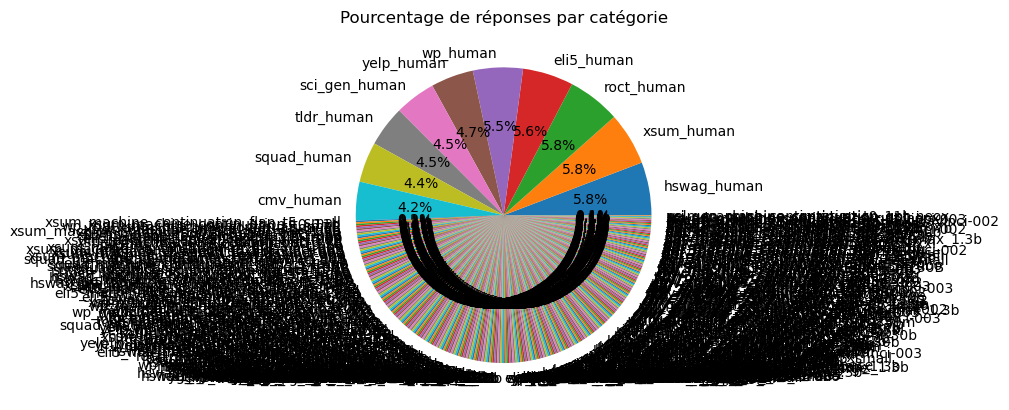

In [5]:
# ETAPE 1 : 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

count_per_src = df['src'].value_counts()

percentage_per_src = count_per_src / count_per_src.sum() * 100

plt.pie(percentage_per_src, labels=percentage_per_src.index, autopct='%1.1f%%')
plt.title('Pourcentage de réponses par catégorie')
plt.show()

/tmp/ipykernel_106405/2815156575.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=count_per_label.index, y=count_per_label.values, palette='coolwarm', ci=None, width=0.5)
/tmp/ipykernel_106405/2815156575.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_per_label.index, y=count_per_label.values, palette='coolwarm', ci=None, width=0.5)


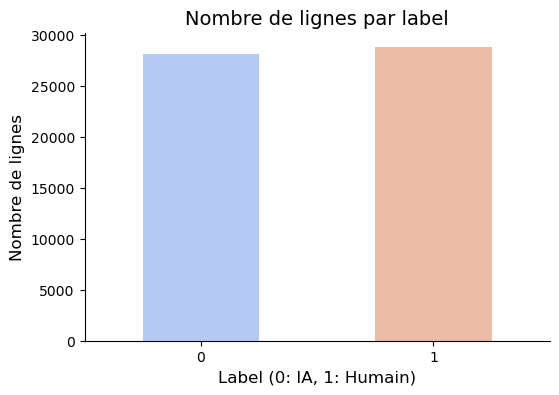

In [10]:
# ETAPE 2 : 
# 1 c'est humain et 0 c'est IA

count_per_label = df['label'].value_counts()

plt.figure(figsize=(6, 4))  
sns.barplot(x=count_per_label.index, y=count_per_label.values, palette='coolwarm', ci=None, width=0.5)  
plt.xlabel('Label (0: IA, 1: Humain)', fontsize=12)  
plt.ylabel('Nombre de lignes', fontsize=12)  
plt.title('Nombre de lignes par label', fontsize=14) 

sns.despine() 
plt.show()

In [12]:
# ETAPE 3 : 
# Rajout d'une colonne avec le nombre de mots dans la colonne 'text' 

df['number_words'] = df['text'].apply(lambda x: len(x.split()))
df

,text,label,src,number_words
0,Little disclaimer: this deals with US laws and...,1,cmv_human,581
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human,241
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human,460
3,"I believe in a flat tax system, where everyone...",1,cmv_human,249
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human,368
...,...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human,137
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human,210
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human,143
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human,185


/tmp/ipykernel_106405/586176934.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=mean_word_count_per_label.index, y=mean_word_count_per_label.values, palette='viridis', ci=None, width=0.5)
/tmp/ipykernel_106405/586176934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_word_count_per_label.index, y=mean_word_count_per_label.values, palette='viridis', ci=None, width=0.5)


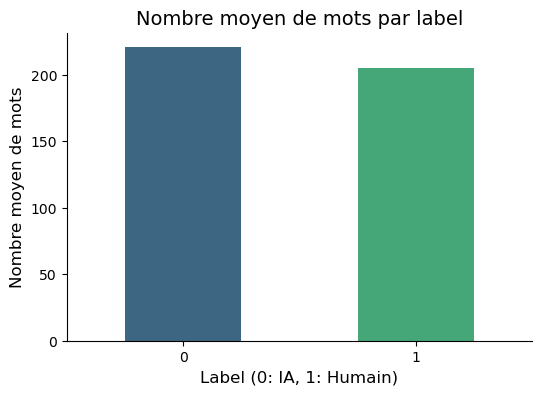

In [13]:
# Bar chart nombre de mots moyen pour humain et AI

mean_word_count_per_label = df.groupby('label')['number_words'].mean()

plt.figure(figsize=(6, 4)) 
sns.barplot(x=mean_word_count_per_label.index, y=mean_word_count_per_label.values, palette='viridis', ci=None, width=0.5)

plt.xlabel('Label (0: IA, 1: Humain)', fontsize=12)  
plt.ylabel('Nombre moyen de mots', fontsize=12)  
plt.title('Nombre moyen de mots par label', fontsize=14)  

sns.despine()
plt.show()

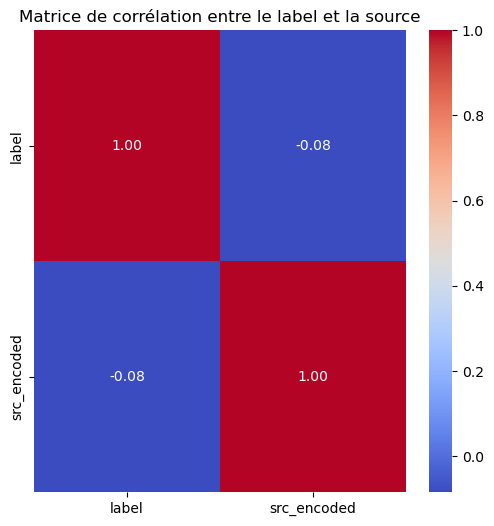

In [14]:
# ETAPE 4 :
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['src_encoded'] = le.fit_transform(df['src'])

correlation_matrix = df[['label', 'src_encoded']].corr()


plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matrice de corrélation entre le label et la source')
plt.show()

In [16]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 28.9 MB/s eta 0:00:00


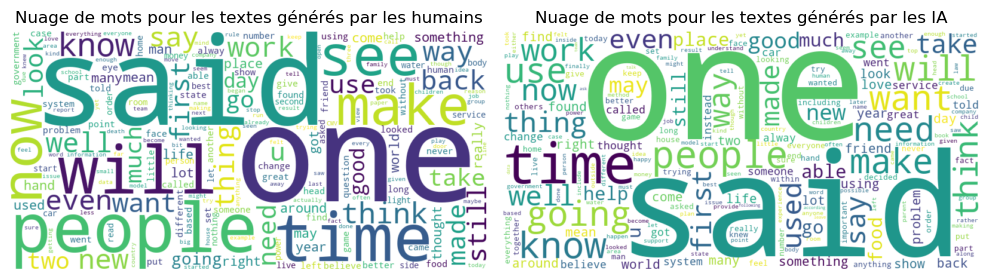

In [17]:
# ETAPE 5 
from collections import Counter
from wordcloud import WordCloud

human_texts = ' '.join(df[df['label'] == 1]['text']) 
ai_texts = ' '.join(df[df['label'] == 0]['text'])  

human_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(human_texts)
ai_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ai_texts)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots pour les textes générés par les humains')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots pour les textes générés par les IA')
plt.axis("off")

plt.tight_layout()
plt.show()